### The Fernet library is utilized for symmetric encryption and decryption of data in Python. It provides a simple and secure way to encrypt and decrypt sensitive information using symmetric encryption algorithms.

In [11]:
from cryptography.fernet import Fernet
import pymysql

In [12]:
# Generate encryption key (keep this secure)
key = Fernet.generate_key()
cipher_suite = Fernet(key)


In [13]:
# Function to encrypt data
def encrypt_data(data):
    encrypted_data = cipher_suite.encrypt(data.encode())
    return encrypted_data

# Function to decrypt data
def decrypt_data(encrypted_data):
    decrypted_data = cipher_suite.decrypt(encrypted_data).decode()
    return decrypted_data


In [14]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='*******',
                             database='patientdb')


In [20]:
# Sample data insertion (encrypt before storing)
with connection.cursor() as cursor:
    # List of tuples containing data for multiple records
    records_to_insert = [
        ("Arunim", "20", "Male", "1234567890", "Sample diagnosis 1"),
        ("John", "25", "Male", "9876543210", "Sample diagnosis 2"),
        ("Emily", "30", "Female", "1112223333", "Sample diagnosis 3")
        # Add more records as needed following the same tuple structure
    ]

    # Encrypt sensitive data for each record
    encrypted_records = [
        (encrypt_data(record[0]), encrypt_data(record[1]), encrypt_data(record[2]),
         encrypt_data(record[3]), encrypt_data(record[4])) for record in records_to_insert
    ]

    # SQL query to insert multiple records
    sql_insert = "INSERT INTO N1PatientsData (name, age, gender, phone, diagnosis) VALUES (%s, %s, %s, %s, %s)"

    # Execute the query for multiple records using executemany()
    cursor.executemany(sql_insert, encrypted_records)

    connection.commit()

# Sample data retrieval (decrypt after retrieving)
with connection.cursor() as cursor:
    sql_select = "SELECT * FROM N1PatientsData"
    cursor.execute(sql_select)
    results = cursor.fetchall()

    print("Decrypted Data:")
    for result in results:
        decrypted_name = decrypt_data(result[1])
        decrypted_age = decrypt_data(result[2])
        decrypted_gender = decrypt_data(result[3])
        decrypted_phone = decrypt_data(result[4])
        decrypted_diagnosis = decrypt_data(result[5])

        print(f"Name: {decrypted_name}")
        print(f"Age: {decrypted_age}")
        print(f"Gender: {decrypted_gender}")
        print(f"Phone: {decrypted_phone}")
        print(f"Diagnosis: {decrypted_diagnosis}")
        print("-------------------")

connection.close()


Decrypted Data:
Name: Arunim
Age: 20
Gender: Male
Phone: 1234567890
Diagnosis: Sample diagnosis 1
-------------------
Name: John
Age: 25
Gender: Male
Phone: 9876543210
Diagnosis: Sample diagnosis 2
-------------------
Name: Emily
Age: 30
Gender: Female
Phone: 1112223333
Diagnosis: Sample diagnosis 3
-------------------


### encrypted data stored in database

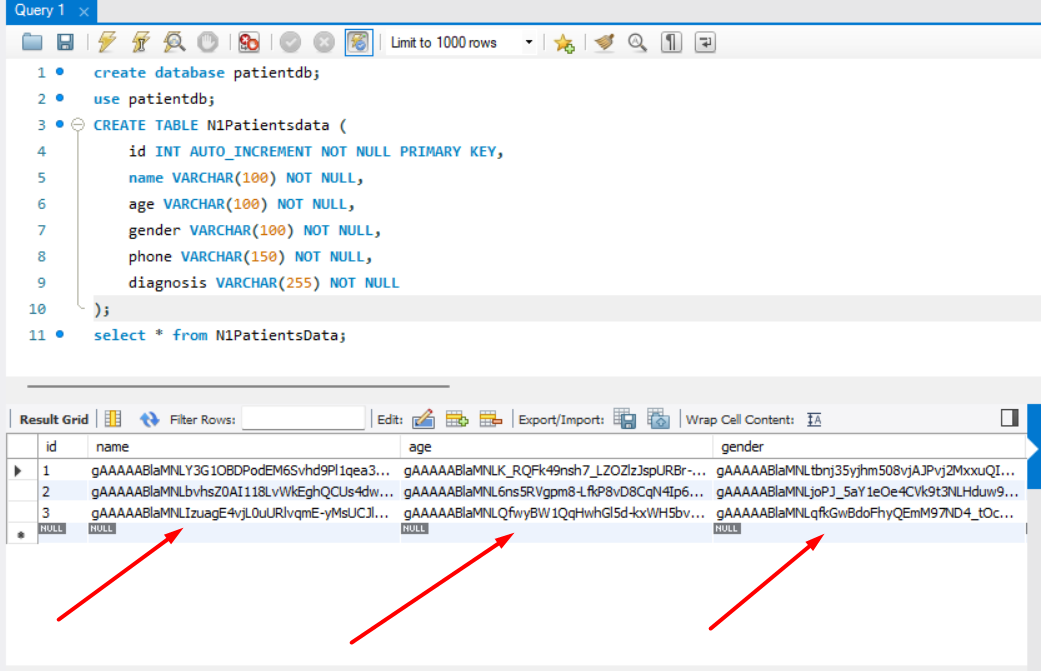

## SQL Queries to run

#### create database patientdb;

#### use patientdb;

#### CREATE TABLE N1Patientsdata (
    id INT AUTO_INCREMENT NOT NULL PRIMARY KEY,
    name VARCHAR(100) NOT NULL,
    age VARCHAR(100) NOT NULL,
    gender VARCHAR(100) NOT NULL,
    phone VARCHAR(150) NOT NULL,
    diagnosis VARCHAR(255) NOT NULL
);

#### select * from N1PatientsData;